In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [2]:
df_test = pd.read_csv('C:/Users/91844/Downloads/archive/Genre Classification Dataset/test_data.txt', sep=":::", header=0, engine='python')
df_train = pd.read_csv('C:/Users/91844/Downloads/archive/Genre Classification Dataset/train_data.txt', sep=":::", header=0, engine='python')
df_test.columns = ['SN', 'movie_name', 'confession']
df_train.columns = ['SN', 'movie_name', 'category', 'confession'] 

In [3]:
df_test.head(10)

,SN,movie_name,confession
0,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
1,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
2,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
3,5,Er nu zhai (1955),Before he was known internationally as a mart...
4,6,Riddle Room (2016),Emily Burns is being held captive in a room w...
5,7,L'amica (1969),The beautiful but neglected wife of a brillia...
6,8,Ina Mina Dika (1989),Vasu Inamdar (Ina) suffers from a disorder wh...
7,9,Equinox Special: Britain's Tornados (2005),An insight into the tornados that hit Kensal ...
8,10,Press (2011),Press is a story of young people overwhelmed ...
9,11,The Firm Man (1975),Not much is known about the firm for which bu...


In [4]:
df_test.tail(10)

,SN,movie_name,confession
54189,54191,"""House Invaders"" (1998)",House Invaders features a different home each...
54190,54192,Eduardo Ducay. El cine que siempre estuvo ahí...,Visual documentary about the figure of produc...
54191,54193,Dinosaurs Decoded (2009),National Geographic reviews Jack Horner's res...
54192,54194,The World of Art Presents: Drawing for Anyone...,Jump right in to drawing animals along with C...
54193,54195,Slender Existence (2000),Slender Existence is the first-ever personal ...
54194,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54195,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54196,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54197,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."
54198,54200,Curitiba Zero Grau (2010),"Curitiba is a city in movement, with rhythms ..."


In [5]:
df_train.head(10)

,SN,movie_name,category,confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
5,7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...
6,8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...
7,9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss..."
8,10,Spirits (2014/I),horror,Four high school students embark on a terrify...
9,11,The Spirit World: Ghana (2016),documentary,Tom Beacham explores Ghana with Director of P...


In [6]:
df_train.tail(10)

,SN,movie_name,category,confession
54203,54205,Pogrindis.NET (2013),short,Young looser filmmaker tries to produce a fil...
54204,54206,Counting Sheep (2004),documentary,Bighorn sheep once roamed the Sierra Nevada i...
54205,54207,The Devin Townsend Project: By a Thread - Liv...,music,"In November 2011, The Devin Townsend Project ..."
54206,54208,Kaçamak (1988),drama,A man and woman meet during the identificatio...
54207,54209,Izpiti po nikoe vreme (1974),family,"First story, ""Temptation"": Two kids find a wa..."
54208,54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54209,54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54210,54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54211,54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...
54212,54214,Nature's Fury: Storm of the Century (2006),history,"On Labor Day Weekend, 1935, the most intense ..."


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54199 entries, 0 to 54198
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SN          54199 non-null  int64 
 1   movie_name  54199 non-null  object
 2   confession  54199 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54213 entries, 0 to 54212
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SN          54213 non-null  int64 
 1   movie_name  54213 non-null  object
 2   category    54213 non-null  object
 3   confession  54213 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [9]:
df_test.describe()

,SN
count,54199.000000
mean,27101.000000
std,15646.047957
min,2.000000
25%,13551.500000
50%,27101.000000
75%,40650.500000
max,54200.000000


In [10]:
df_train.describe()

,SN
count,54213.000000
mean,27108.000000
std,15650.089409
min,2.000000
25%,13555.000000
50%,27108.000000
75%,40661.000000
max,54214.000000


In [11]:
df_test.isnull().sum()

SN            0
movie_name    0
confession    0
dtype: int64

In [12]:
df_train.isnull().sum()

SN            0
movie_name    0
category      0
confession    0
dtype: int64

In [13]:
df_test.count()

SN            54199
movie_name    54199
confession    54199
dtype: int64

In [14]:
df_train.count()

SN            54213
movie_name    54213
category      54213
confession    54213
dtype: int64

In [15]:
df_train.iloc[0:3]

,SN,movie_name,category,confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...


In [16]:
df_train.loc[0]

SN                                                            2
movie_name                                        Cupid (1997) 
category                                              thriller 
confession     A brother and sister with a past incestuous r...
Name: 0, dtype: object

In [17]:
df_test.shape

(54199, 3)

In [18]:
df_train.shape

(54213, 4)

# Data Visualisation

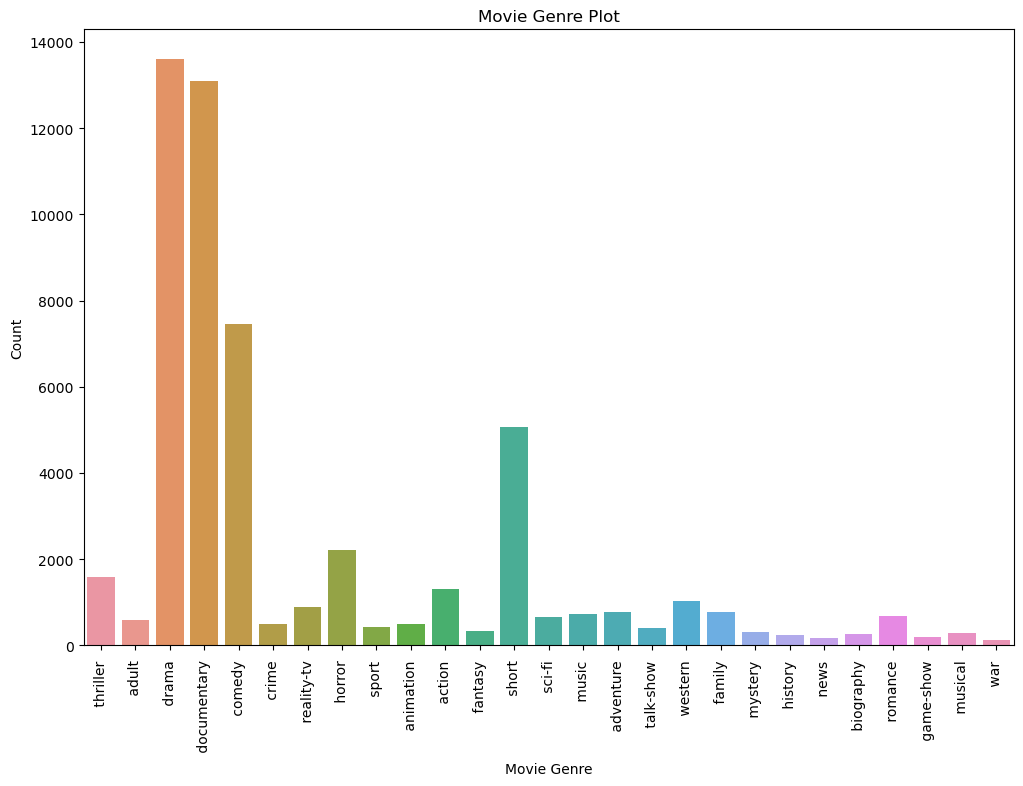

In [22]:
plt.figure(figsize=(12,8))
sns.countplot(x='category', data=df_train)
plt.xlabel('Movie Genre')
plt.ylabel('Count')
plt.title('Movie Genre Plot')
plt.xticks(rotation=90);
plt.show()

C:\Users\91844\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


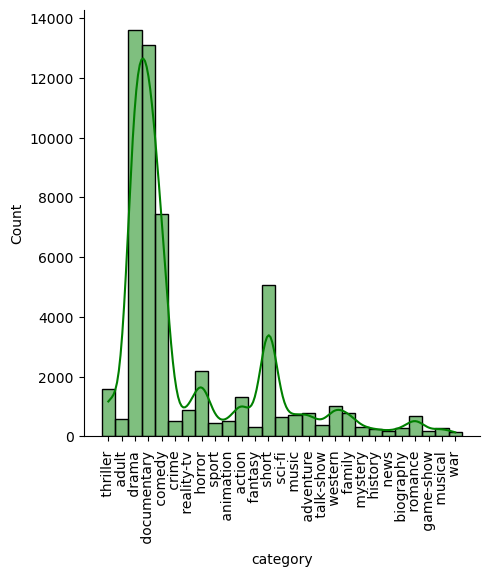

In [23]:
sns.displot(df_train.category, kde = True, color = "green")
plt.xticks(rotation = 90);

C:\Users\91844\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


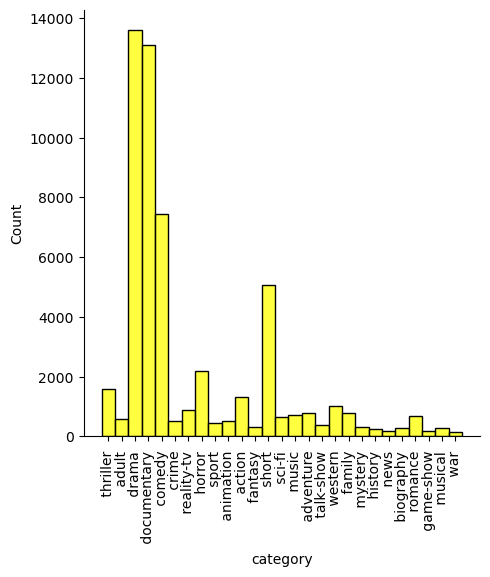

In [24]:
sns.displot(df_train.category, kde = False, color = "yellow")
plt.xticks(rotation = 90);

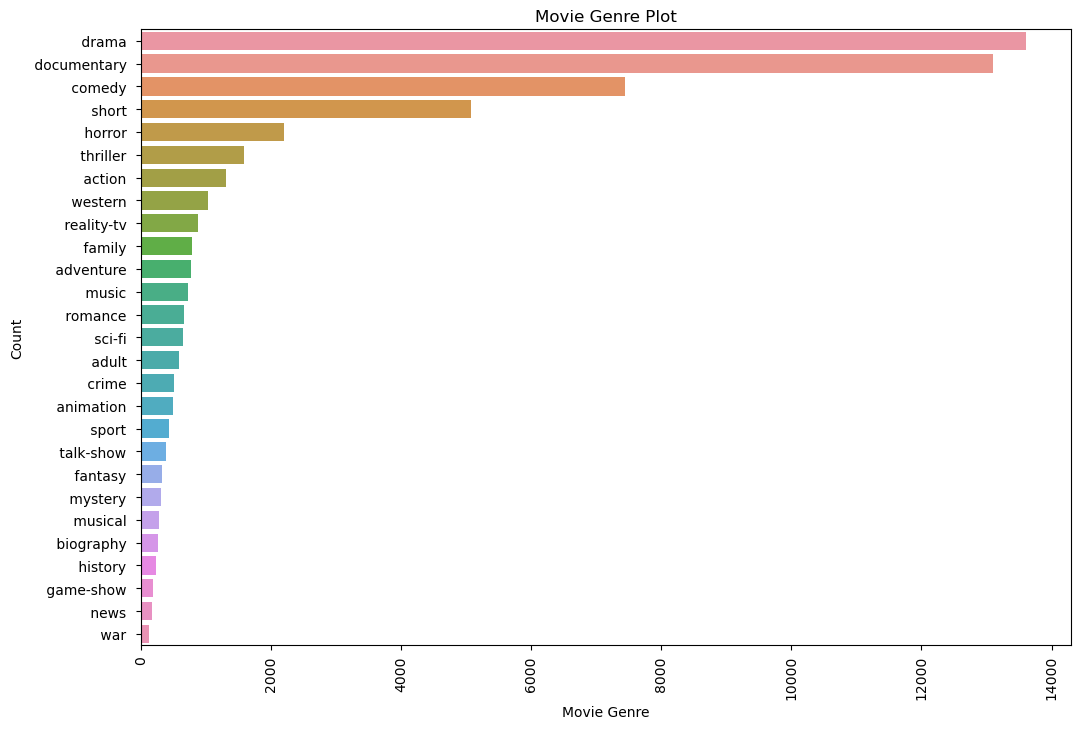

In [26]:
plt.figure(figsize=(12,8))
count_1 = df_train.category.value_counts()
sns.barplot(x=count_1, y=count_1.index,orient='h')
plt.xlabel('Movie Genre')
plt.ylabel('Count')
plt.title('Movie Genre Plot')
plt.xticks(rotation = 90)
plt.show()

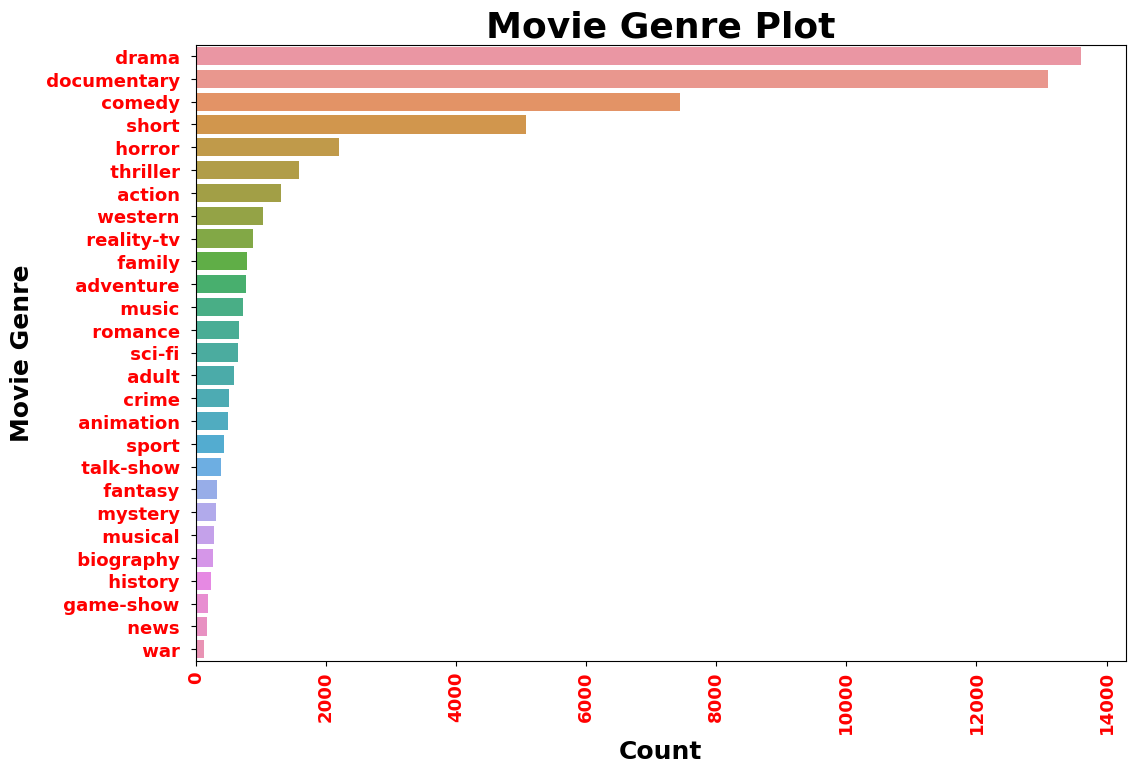

In [30]:
plt.figure(figsize=(12,8))
count_1 = df_train.category.value_counts()
sns.barplot(x=count_1, y=count_1.index,orient='h')
plt.xlabel('Count', fontsize=18, fontweight='bold')
plt.ylabel('Movie Genre', fontsize=18, fontweight='bold')
plt.title('Movie Genre Plot', fontsize=26, fontweight='bold', color='black')
plt.xticks(rotation=90, fontsize=13, fontweight='bold', color='red')
plt.yticks(fontsize=13, fontweight='bold', color='red')
plt.show()

In [31]:
df_combined = pd.concat([df_train, df_test], axis=0)

In [32]:
df_combined.head(10)

,SN,movie_name,category,confession
0,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
1,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
2,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
3,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
4,6,Quality Control (2011),documentary,Quality Control consists of a series of 16mm ...
5,7,"""Pink Slip"" (2009)",comedy,In tough economic times Max and Joey have all...
6,8,One Step Away (1985),crime,Ron Petrie (Keanu Reeves) is a troubled teen ...
7,9,"""Desperate Hours"" (2016)",reality-tv,"A sudden calamitous event, causing great loss..."
8,10,Spirits (2014/I),horror,Four high school students embark on a terrify...
9,11,The Spirit World: Ghana (2016),documentary,Tom Beacham explores Ghana with Director of P...


In [33]:
df_combined.tail(10)

,SN,movie_name,category,confession
54189,54191,"""House Invaders"" (1998)",NaN,House Invaders features a different home each...
54190,54192,Eduardo Ducay. El cine que siempre estuvo ahí...,NaN,Visual documentary about the figure of produc...
54191,54193,Dinosaurs Decoded (2009),NaN,National Geographic reviews Jack Horner's res...
54192,54194,The World of Art Presents: Drawing for Anyone...,NaN,Jump right in to drawing animals along with C...
54193,54195,Slender Existence (2000),NaN,Slender Existence is the first-ever personal ...
54194,54196,"""Tales of Light & Dark"" (2013)",NaN,"Covering multiple genres, Tales of Light & Da..."
54195,54197,Der letzte Mohikaner (1965),NaN,As Alice and Cora Munro attempt to find their...
54196,54198,Oliver Twink (2007),NaN,A movie 169 years in the making. Oliver Twist...
54197,54199,Slipstream (1973),NaN,"Popular, but mysterious rock D.J Mike Mallard..."
54198,54200,Curitiba Zero Grau (2010),NaN,"Curitiba is a city in movement, with rhythms ..."


In [34]:
df_combined.shape

(108412, 4)

In [35]:
df_combined.size

433648

In [36]:
df_combined.isnull().any()

SN            False
movie_name    False
category       True
confession    False
dtype: bool

In [37]:
df_combined.count()

SN            108412
movie_name    108412
category       54213
confession    108412
dtype: int64

In [39]:
encoder = LabelEncoder()
df_combined["category"]=encoder.fit_transform(df_combined["category"].values)

In [41]:
encoder = LabelEncoder()
df_combined["movie_name"]=encoder.fit_transform(df_combined["movie_name"].values)

In [42]:
df_combined.head()

,SN,movie_name,category,confession
0,2,31219,24,A brother and sister with a past incestuous r...
1,3,107506,1,As the bus empties the students for their fie...
2,4,96119,8,To help their unemployed father make ends mee...
3,5,97557,8,The film's title refers not only to the un-re...
4,6,74516,7,Quality Control consists of a series of 16mm ...


In [46]:
df_combined.tail()

,SN,movie_name,category,confession
54194,54196,10005,27,"Covering multiple genres, Tales of Light & Da..."
54195,54197,33686,27,As Alice and Cora Munro attempt to find their...
54196,54198,69188,27,A movie 169 years in the making. Oliver Twist...
54197,54199,81922,27,"Popular, but mysterious rock D.J Mike Mallard..."
54198,54200,31240,27,"Curitiba is a city in movement, with rhythms ..."


In [43]:
df_combined.category = df_combined.category.fillna(df_combined.category.mean())

In [44]:
df_combined.count()

SN            108412
movie_name    108412
category      108412
confession    108412
dtype: int64

In [45]:
df_combined.duplicated().values.any()

False

# Data Preprocessing 

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [50]:
vectorizer = TfidfVectorizer()

In [51]:
x = vectorizer.fit_transform(df_combined["confession"])

In [52]:
df_combined.head(10)

,SN,movie_name,category,confession
0,2,31219,24,A brother and sister with a past incestuous r...
1,3,107506,1,As the bus empties the students for their fie...
2,4,96119,8,To help their unemployed father make ends mee...
3,5,97557,8,The film's title refers not only to the un-re...
4,6,74516,7,Quality Control consists of a series of 16mm ...
5,7,8044,5,In tough economic times Max and Joey have all...
6,8,69673,6,Ron Petrie (Keanu Reeves) is a troubled teen ...
7,9,2792,18,"A sudden calamitous event, causing great loss..."
8,10,83283,13,Four high school students embark on a terrify...
9,11,96648,7,Tom Beacham explores Ghana with Director of P...


In [53]:
df_combined.tail(10)

,SN,movie_name,category,confession
54189,54191,4859,27,House Invaders features a different home each...
54190,54192,36822,27,Visual documentary about the figure of produc...
54191,54193,34619,27,National Geographic reviews Jack Horner's res...
54192,54194,98212,27,Jump right in to drawing animals along with C...
54193,54195,81889,27,Slender Existence is the first-ever personal ...
54194,54196,10005,27,"Covering multiple genres, Tales of Light & Da..."
54195,54197,33686,27,As Alice and Cora Munro attempt to find their...
54196,54198,69188,27,A movie 169 years in the making. Oliver Twist...
54197,54199,81922,27,"Popular, but mysterious rock D.J Mike Mallard..."
54198,54200,31240,27,"Curitiba is a city in movement, with rhythms ..."


In [54]:
y = df_combined["category"]

In [55]:
x_test, x_train, y_test, y_train = train_test_split(x,y,test_size=0.3,random_state=40)

# Naive Bayes Classifier

In [56]:
naive_bayes_model = MultinomialNB()

In [57]:
naive_bayes_model.fit(x_train, y_train)

MultinomialNB()

In [58]:
nb_predictions = naive_bayes_model.predict(x_test)

In [59]:
print("Naive Bayes Model")
print(confusion_matrix(y_test, nb_predictions))
print(classification_report(y_test, nb_predictions))
print("Accuracy - ",accuracy_score(y_test, nb_predictions))
print("r2_Score - ",r2_score(y_test, nb_predictions))

Naive Bayes Model
[[    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   924]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   425]
 [    0     0     0     0     0     0     0     0     1     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   519]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   352]
 [    0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   183]
 [    0     0     0     0     0     0     0     0     2     0     0     0
      0     0     0     0     0  

C:\Users\91844\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91844\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91844\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Logistic Regression Model

In [60]:
logistic_regression_model = LogisticRegression()

In [61]:
logistic_regression_model.fit(x_train, y_train)

C:\Users\91844\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
log_reg_predictions = logistic_regression_model.predict(x_test)

In [63]:
print("Logistic Regression Model")
print(confusion_matrix(y_test, log_reg_predictions))
print(classification_report(y_test, log_reg_predictions))
print("Accuracy - ",accuracy_score(y_test, log_reg_predictions))
print("r2_Score - ",r2_score(y_test, log_reg_predictions))

Logistic Regression Model
[[    0     0     0     0     0     2     0     3     8     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   911]
 [    0     0     0     0     0     1     0     0     5     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   419]
 [    0     0     1     0     0     1     0    12     1     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   505]
 [    0     0     0     0     0     2     0     1     3     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   346]
 [    0     0     0     0     0     0     0    18     2     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0   163]
 [    0     0     0     0     0   243     0     8    75     0     0     0
      0     1     0     0

C:\Users\91844\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91844\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\91844\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
